In [1]:
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation


import importlib
importlib.reload(meld_graph)
importlib.reload(meld_graph.models)
importlib.reload(meld_graph.dataset)
importlib.reload(meld_graph.experiment)
importlib.reload(meld_graph.data_preprocessing)
importlib.reload(meld_graph.evaluation)

import logging
import os
import json

from meld_graph.dataset import GraphDataset, Oversampler
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_graph.training import Metrics
import numpy as np
from meld_graph.paths import EXPERIMENT_PATH

from meld_graph.evaluation import Evaluator



Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1


### Generate dataset

In [2]:
#initialise dataset

cohort= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5')
# subject_ids = cohort.get_subject_ids(group='all', dataset='MELD_dataset_V6_test.csv' )
subjects = ['MELD_H4_15T_FCD_0011',]
features= ['.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.combat.on_lh.thickness.sm10.mgh',
          '.combat.on_lh.w-g.pct.sm10.mgh',
          '.combat.on_lh.sulc.sm5.mgh',
          '.combat.on_lh.curv.sm5.mgh',
          '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',]

# initiate params
params = {                
          "features":features,
          "augment_data": {}, 
          "lesion_bias": 0,
          "lobes": False,
          "synthetic_data": {
            'run_synthetic':False,
            'n_subs': 20,
            'use_controls':True,
            'bias': 0,
            'radius':0.5,
            'n_subtypes':1,
            'proportion_features_abnormal':0.9,
            'proportion_hemispheres_lesional':0.9,
            'jitter_factor':2, 
            },
          "preprocessing_parameters": {
              "scaling": None, 
              "zscore": True,
            },
          "combine_hemis": None,
          }

dataset = GraphDataset(subjects, cohort, params )


In [3]:
dataset

GraphDataset(2)

In [3]:
import torch_geometric.data
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data_loader = torch_geometric.loader.DataLoader(dataset,
            shuffle=False, batch_size=2)
for data in data_loader:
    print('loader')
    data = data.to(device)
    test = data.x

loader


In [13]:
data.x

tensor([[-0.7035, -1.3293, -1.4115,  ..., -0.3818, -0.3552, -0.4100],
        [-0.8725,  0.7342,  0.0029,  ...,  1.4526,  1.5475,  1.4228],
        [ 0.4470,  1.1417, -0.8217,  ...,  0.5506,  1.3800,  1.8729],
        ...,
        [ 2.4979, -0.3456, -0.5083,  ..., -0.2423, -0.3398, -0.6039],
        [ 2.4951, -0.3297, -0.4548,  ..., -0.3026, -0.4469, -0.7625],
        [ 2.4151, -0.3078, -0.4007,  ..., -0.3596, -0.5555, -0.9115]])

### Load models and predict

In [4]:
# initialise model
EXPERIMENT_PATH='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1'

model_base_paths = {
    # 3layer
    '3layer_real_pretrainradius0.5': os.path.join(EXPERIMENT_PATH,'22-08-22_real_3layer/from_synth_baselineFTprop_features0.2FTradius0.5/fold_00'),
    # 3layer real data
    '3layer_real_pretrainradius1': os.path.join(EXPERIMENT_PATH, '22-08-22_real_3layer/from_synth_baselineFTprop_features0.2/fold_00'),
    # unet
    '3layer_real_scratch':  os.path.join(EXPERIMENT_PATH, '22-08-22_real_3layer/from_scratch/fold_00'),
}

In [5]:
#load experiment already trained using checkpoint path
from pyexpat import model

model_base_path=model_base_paths['3layer_real_pretrainradius0.5']

checkpoint_path=os.path.join(EXPERIMENT_PATH, model_base_path)

exp = meld_graph.experiment.Experiment.from_folder(checkpoint_path)


Initialised Experiment 22-08-22_real_3layer/from_synth_baselineFTprop_features0.2FTradius0.5


In [6]:
# Run the evaluation on the test data and save into directory provided
# Save images and evaluation metrics in path provided

save_dir=os.path.join(EXPERIMENT_PATH,'22-09-29_real_eval')

eva = Evaluator(experiment = exp,
                checkpoint_path = checkpoint_path,
                save_dir = save_dir ,
                make_images = True,
                dataset=dataset,
                subject_ids=subjects,
                cohort=cohort,
               )


Using coord type exact
Loading model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-08-22_real_3layer/from_synth_baselineFTprop_features0.2FTradius0.5/fold_00/best_model.pt


conv 33 16
conv 16 16
conv 16 16


In [7]:
# eva.evaluate()


# # load data and predict
eva.load_predict_data()
# # calculate stats 
# eva.stat_subjects()
#  # make images 
# eva.plot_subjects_prediction()

loading data and predicting model
saving prediction for MELD_H4_15T_FCD_0011


AttributeError: 'Evaluator' object has no attribute 'threshold'

### Compare models

In [ ]:
# look at t-test 

### Compare to baseline


In [19]:
import h5py

def load_prediction(subject,hdf5):
    results={}
    with h5py.File(hdf5, "r") as f:
        for hemi in ['lh','rh']:
            results[hemi] = f[subject][hemi]['prediction'][:]
    return results

def create_surface_plots(coords,faces,overlay,flat_map=True):
    """plot and reload surface images"""
    from meld_classifier.meld_plotting import trim
    import matplotlib_surface_plotting.matplotlib_surface_plotting as msp
    from PIL import Image

    msp.plot_surf(coords,faces, 
                overlay,
                flat_map=flat_map,
                rotate=[90, 270],
                filename='tmp.png',
                vmin=0.4,
                vmax=0.6,
             )
    im = Image.open('tmp.png')
    im = trim(im)
    im = im.convert("RGBA")
    im1 = np.array(im)
    return im1

In [20]:
predictions_file_1 = os.path.join('/rds/project/kw350',
             'rds-kw350-meld/experiments',
             'co-ripa1/iteration_21-09-15/ensemble_21-09-15',
             'fold_all/results/',
             'predictions_ensemble_iteration.hdf5')

predictions_file_2 = os.path.join('/rds/project/kw350/rds-kw350-meld/experiments/co-ripa1',
                                       'iteration_21-09-17/ensemble_21-09-20/fold_all/',
                                       'results','predictions_ensemble_iteration.hdf5')

with h5py.File(predictions_file_1, "r") as f:
    subjects1 = list(f.keys())
with h5py.File(predictions_file_2, "r") as f:
    subjects2 = list(f.keys())    
    
subjects = np.unique(subjects1+subjects2)
subjects[0]


c = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',
               dataset='MELD_dataset_V6.csv')

results = []
subject = 'MELD_H4_15T_FCD_0011'
try:
    hdf_predictions = os.path.join('/rds/project/kw350/rds-kw350-meld/experiments/co-ripa1',
                                       'iteration_21-09-15/ensemble_21-09-15/fold_all/',
                                       'results','predictions_ensemble_iteration.hdf5')
    result_hemis = load_prediction(subject,hdf_predictions)

except KeyError:
    hdf_predictions = os.path.join('/rds/project/kw350/rds-kw350-meld/experiments/co-ripa1',
                                       'iteration_21-09-17/ensemble_21-09-20/fold_all/',
                                       'results','predictions_ensemble_iteration.hdf5')
    result_hemis = load_prediction(subject,hdf_predictions)
labels_hemis = {}

subj = MeldSubject(subject,cohort=c)
detected = False
tp=0
fp=0
fn=0
tn=0
for hemi in ['lh','rh']:
    _, labels_hemis[hemi] = subj.load_feature_lesion_data(
        features, hemi=hemi, features_to_ignore=[]
    )
    tp += np.logical_and(labels_hemis[hemi][c.cortex_mask],result_hemis[hemi]).sum()
    detected += tp>0
    fp += np.logical_and(result_hemis[hemi], ~labels_hemis[hemi][c.cortex_mask]).sum()
    fn += np.logical_and(~result_hemis[hemi], labels_hemis[hemi][c.cortex_mask]).sum()
    tn += np.logical_and(~result_hemis[hemi], ~labels_hemis[hemi][c.cortex_mask]).sum()

dice_lesion = np.nan_to_num((2*tp)/(2*tp+fn+fp))
dice_nonlesion = (2*tn)/(2*tn+fn+fp)
results.append([subject,subj.is_patient,
                detected,tp,fn,fp,tn,dice_lesion,dice_nonlesion])


/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


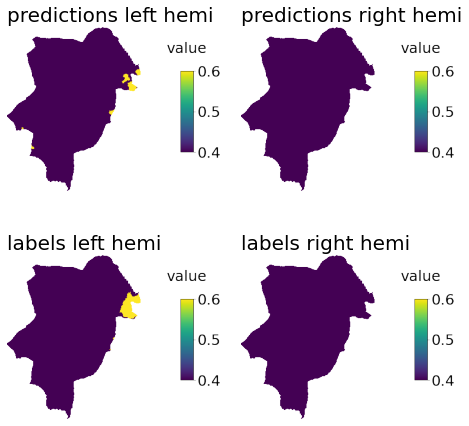

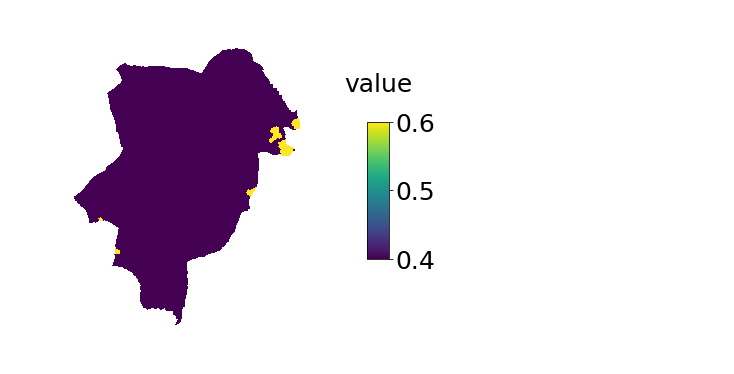

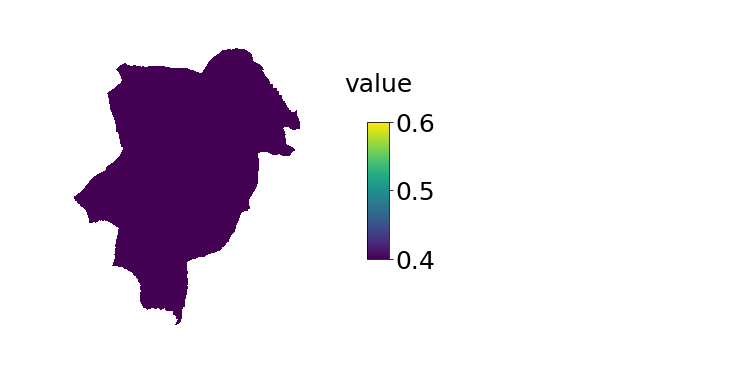

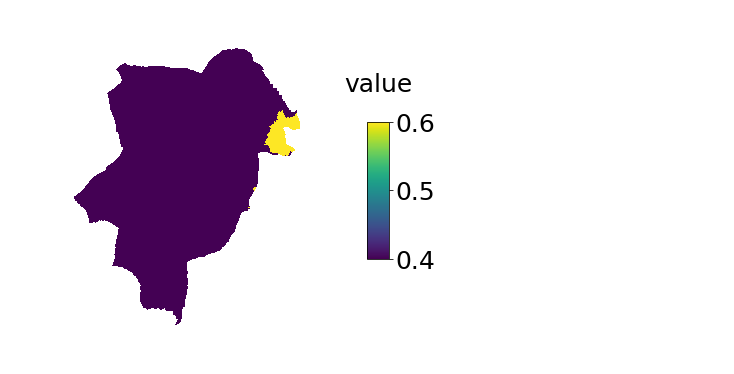

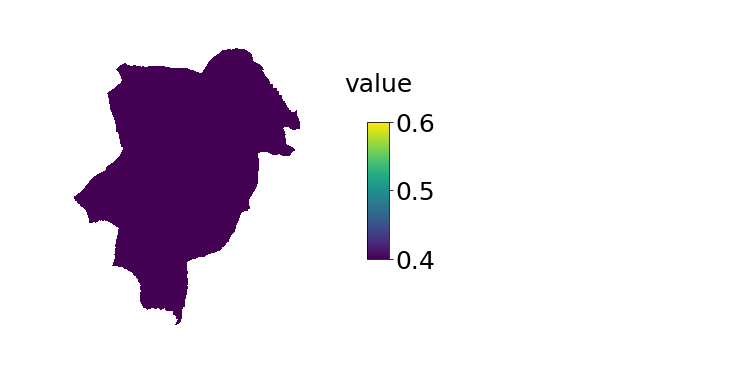

In [24]:
#plot lesion
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nibabel as nb
from meld_classifier.paths import BASE_PATH

flat = nb.load(os.path.join(BASE_PATH, "fsaverage_sym", "surf", "lh.full.patch.flat.gii"))
coords, faces = flat.darrays[0].data, flat.darrays[1].data

# round up to get the square grid size
fig= plt.figure(figsize=(8,8), constrained_layout=True)
gs1 = GridSpec(2, 2, width_ratios=[1, 1],  wspace=0.1, hspace=0.1)
data_to_plot= [result_hemis['lh'], result_hemis['rh'], labels_hemis['lh'], labels_hemis['rh']]
titles=['predictions left hemi', 'predictions right hemi', 'labels left hemi', 'labels right hemi']
for i,overlay in enumerate(data_to_plot):
      if len(overlay) < len(cohort.cortex_mask):
            overlay_tmp=np.zeros(len(cohort.cortex_mask))
            overlay_tmp[cohort.cortex_mask]= overlay
            overlay=overlay_tmp
      ax = fig.add_subplot(gs1[i])
      im = create_surface_plots(coords,faces,overlay,flat_map=True)
      ax.imshow(im)
      ax.axis('off')
      ax.set_title(titles[i], loc='left', fontsize=20)  
# fig.savefig(filename, bbox_inches='tight')
# plt.close("all")
fig.show()


In [22]:
result_hemis['lh'].shape

(146902,)

In [23]:
labels_hemis['lh'].shape

(163842,)